In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression , Lasso , Ridge , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df1 = pd.read_csv("1- cumulative-area-burnt-by-wildfires-by-week.csv").drop("2024" , axis = 1)
df2 = pd.read_csv("2- annual-area-burnt-by-wildfires.csv")
df3 = pd.read_csv("3- share-of-the-total-land-area-burnt-by-wildfires-each-year.csv")
df4 = pd.read_csv("4- annual-area-burnt-per-wildfire.csv")
df5 = pd.read_csv("5- annual-burned-area-by-landcover.csv")

cross_df = pd.read_csv("climate_change_data.csv")
#                                                 Notes on Project

# We need to find out what the units are for this data set.

# Pearsons Correlation coefficient for each feature relative to target using Sci py

# AJupyter lab interface over Jupyer notebook

# Videos of explaining the problem. Explain with a voiceover while having a video of a fire
        

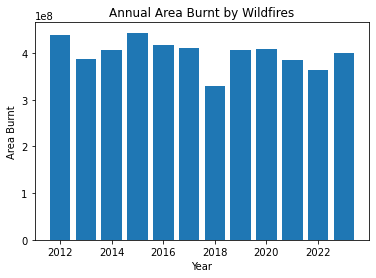

In [2]:
df2 = df2.drop(df2[df2['Year'] == 2024].index)

X = df2["Year"].values
y = df2["Annual area burnt by wildfires"].values


# Plotting on the first subplot
plt.bar(X, y)  
plt.title("Annual Area Burnt by Wildfires")
plt.xlabel("Year")
plt.ylabel("Area Burnt")

plt.show()
# Wildfire impact has remain relatively stable over the years

In [3]:
climate_df = pd.read_csv("climate_change_data.csv")

list_of_countries = ["Brazil", "United States of America", "France", "China", "Egypt", "Australia"]

# Filter the DataFrame using the 'isin()' method
filtered_df = climate_df[climate_df["Country"].isin(list_of_countries)]

climate_features = ["Temperature" , "CO2 Emissions" , "Sea Level Rise" , "Precipitation" , "Humidity" , "Wind Speed"]

mean_per_country = filtered_df.groupby("Country")[climate_features].mean()

mean_per_country # Calculates the mean of each feature in the given country to give us an idea of how each relates to one another

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Country,,,,,,
Australia,15.847275,389.109948,0.145529,60.212414,45.941867,28.371003
Brazil,15.150253,397.854995,-0.030978,50.678227,47.505357,24.011724
China,15.734713,408.246801,-0.043965,53.037033,48.754341,25.188457
Egypt,14.732166,386.678533,-0.224828,54.372475,48.652548,23.915319
France,14.045269,408.300468,0.157316,46.360152,49.818987,22.023190
United States of America,17.280005,387.682379,-0.025525,59.166140,41.478402,23.886488


In [4]:
wildfire_df = pd.read_csv("1- cumulative-area-burnt-by-wildfires-by-week.csv")

wildfire_df = wildfire_df.drop("2024" , axis = 1)

list_of_countries = ["Brazil", "United States", "France", "China", "Egypt", "Australia"]

filtered_wildfire_df = wildfire_df[wildfire_df["Entity"].isin(list_of_countries)]

list_of_cumulation = ["2023" , "2022" , "2021" , "2020" , "2019" , "2018" , "2017" , "2016" , "2015" , "2014" , "2013" , "2012"]

wildfire_mean = filtered_wildfire_df.groupby("Entity")[list_of_cumulation].mean()

wildfire_mean # Grouped average of the cumulative area burnt (yearly) of every country in every year

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Entity,,,,,,,,,,,,
Australia,1.806775e+07,1.263893e+07,9.731167e+06,8.759591e+06,1.406930e+07,1.697826e+07,1.387856e+07,9.447233e+06,1.480064e+07,1.403819e+07,1.182391e+07,2.273040e+07
Brazil,8.438212e+06,1.125144e+07,1.011521e+07,1.261194e+07,1.188924e+07,6.786873e+06,1.157863e+07,1.085361e+07,1.158473e+07,9.208510e+06,6.021615e+06,1.267228e+07
China,1.814572e+06,1.405055e+06,1.682792e+06,1.916583e+06,1.849822e+06,8.434158e+05,2.006330e+06,1.642966e+06,2.252862e+06,3.075380e+06,1.971776e+06,1.593643e+06
Egypt,8.295865e+03,1.244923e+04,1.018819e+04,7.199058e+03,5.105115e+03,5.634288e+03,1.007596e+04,9.456731e+03,5.783615e+03,5.533019e+03,8.036519e+03,4.879038e+03
France,2.683673e+04,5.004521e+04,2.284044e+04,2.289431e+04,7.233206e+04,5.964577e+03,4.853237e+04,1.247033e+04,1.755388e+04,2.832929e+04,6.305808e+03,3.897187e+04
United States,2.281658e+06,3.760299e+06,3.522415e+06,3.247785e+06,2.581924e+06,3.035137e+06,3.538266e+06,3.114123e+06,3.333988e+06,2.515029e+06,2.357627e+06,2.848275e+06


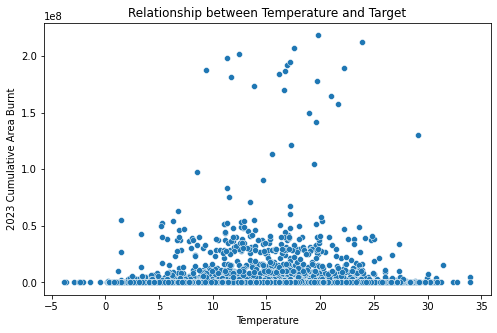

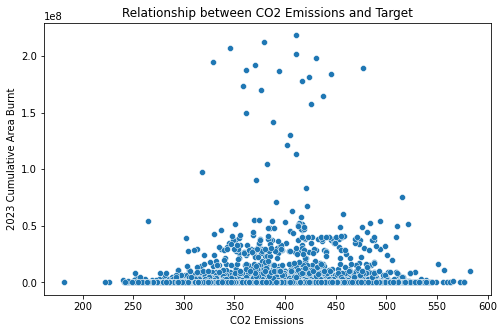

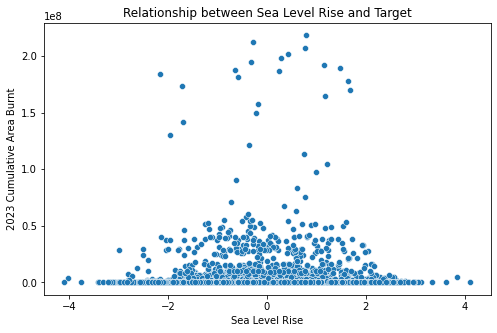

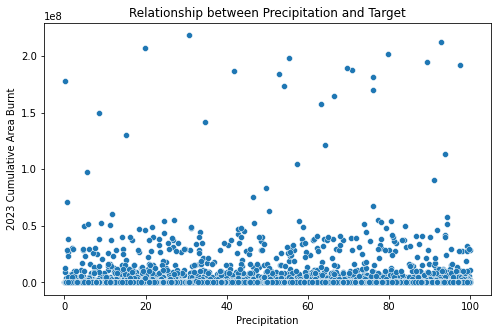

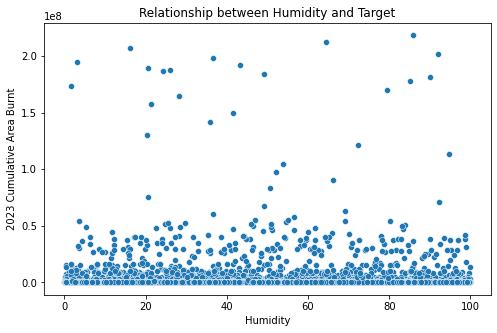

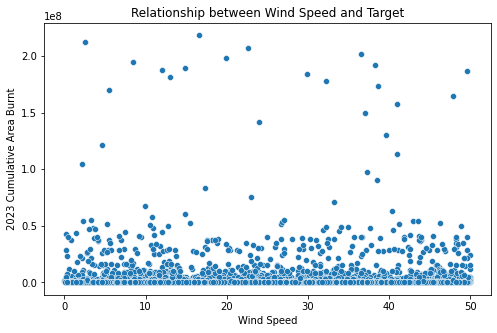

In [5]:
# Based on the data points above, we can see that each country experiences similar wildfires within their domain

# This cell will focus on establishing the most useful features and filtering the data to the best of our ability

import seaborn as sns
import matplotlib.pyplot as plt


# Checking the significance of each feature relative to the target in this case 2023 as all of the years are similar
for feature in climate_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=climate_df[feature], y=wildfire_df['2023']) # Using sns here because matplotlib would not work
    plt.title(f'Relationship between {feature} and Target')
    plt.xlabel(feature)
    plt.ylabel('2023 Cumulative Area Burnt')
    plt.show()
    
# The significance is not showing to be extremely important,  WE NEED TO INVESTIGATE WHY. It appears that it is only
# somewhat relevant for the worst wildfires

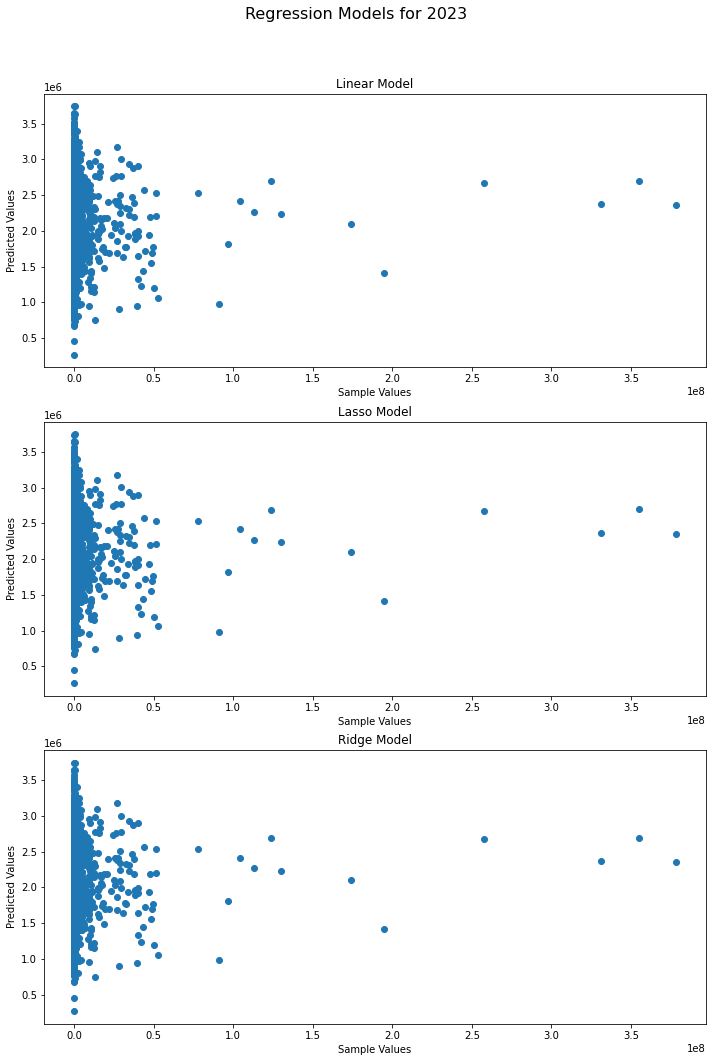

Metrics for 2023 year:

Linear Model:
	R²: -0.0004
	MAE: 3544337.8605
	MSE: 222729122508539.3438
	RMSE: 14924112.1179

Lasso Model:
	R²: -0.0004
	MAE: 3544337.8501
	MSE: 222729122285100.4688
	RMSE: 14924112.1104

Ridge Model:
	R²: -0.0004
	MAE: 3544337.8729
	MSE: 222729117507344.5000
	RMSE: 14924111.9504


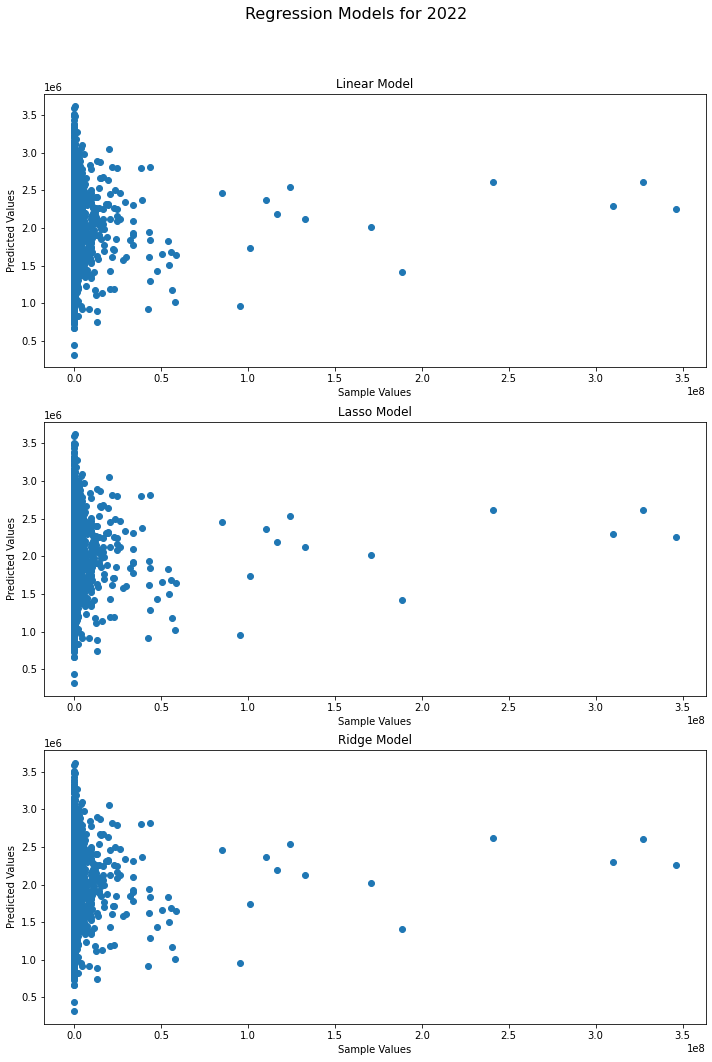

Metrics for 2022 year:

Linear Model:
	R²: -0.0007
	MAE: 3350229.4519
	MSE: 197752934476954.1562
	RMSE: 14062465.4480

Lasso Model:
	R²: -0.0007
	MAE: 3350229.4649
	MSE: 197752934402749.4375
	RMSE: 14062465.4454

Ridge Model:
	R²: -0.0007
	MAE: 3350229.4620
	MSE: 197752929059150.5938
	RMSE: 14062465.2554


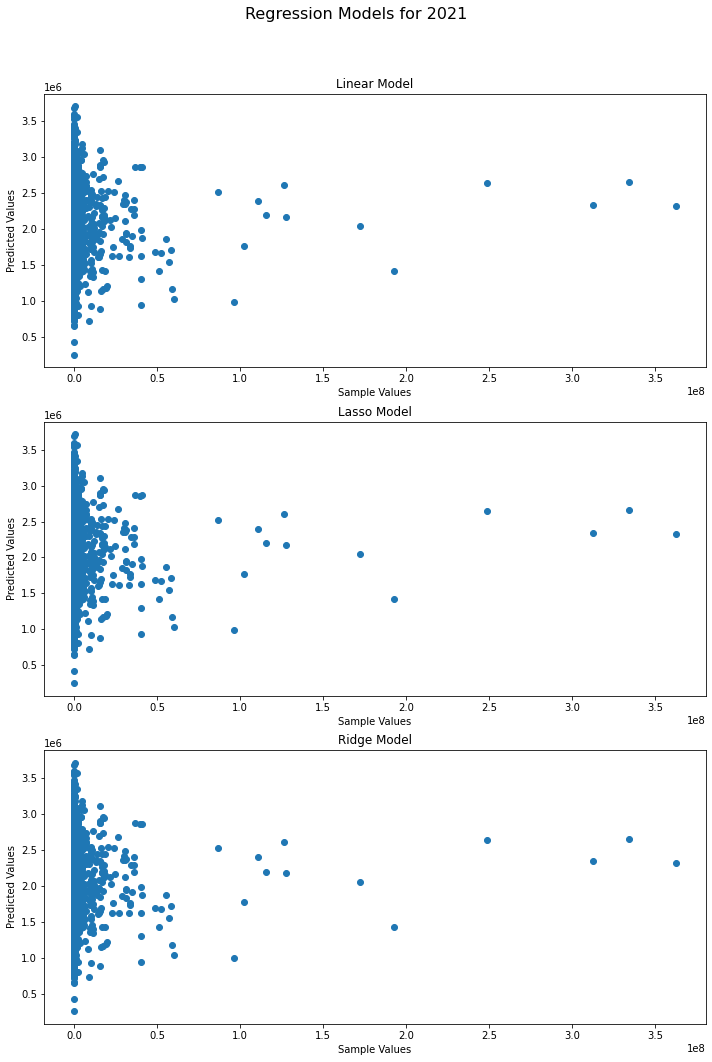

Metrics for 2021 year:

Linear Model:
	R²: -0.0006
	MAE: 3460624.8741
	MSE: 207542596547471.4062
	RMSE: 14406338.7628

Lasso Model:
	R²: -0.0006
	MAE: 3460624.8860
	MSE: 207542596493336.5625
	RMSE: 14406338.7609

Ridge Model:
	R²: -0.0006
	MAE: 3460624.8905
	MSE: 207542590972735.1562
	RMSE: 14406338.5693


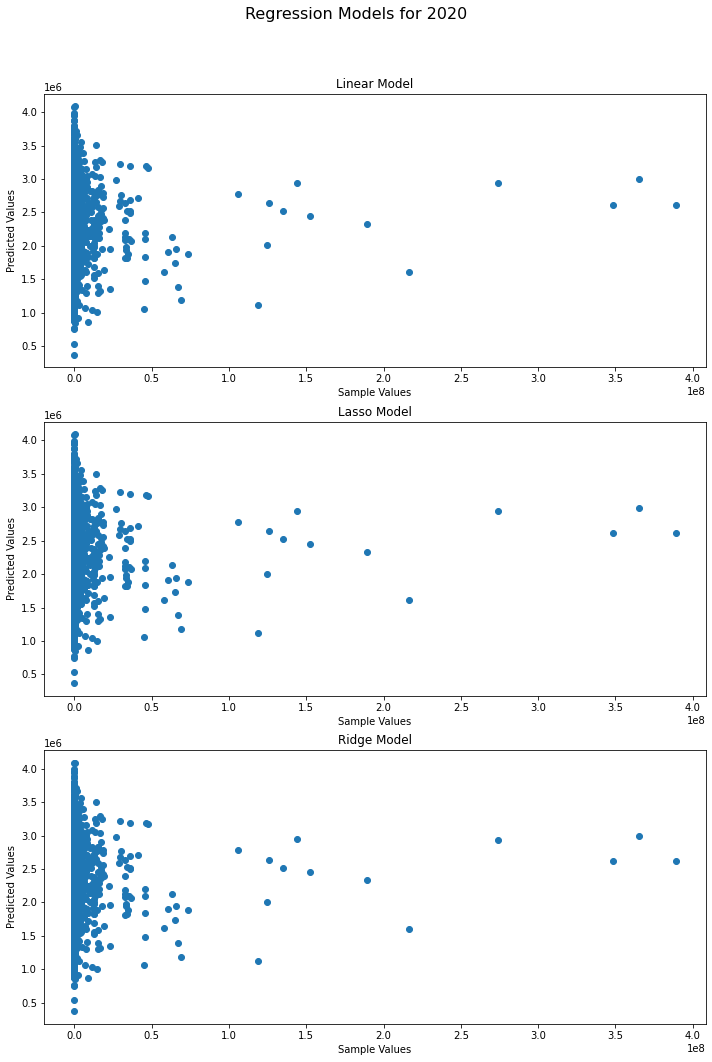

Metrics for 2020 year:

Linear Model:
	R²: -0.0006
	MAE: 3830681.8846
	MSE: 255445092849866.6562
	RMSE: 15982649.7443

Lasso Model:
	R²: -0.0006
	MAE: 3830681.8729
	MSE: 255445092544712.2812
	RMSE: 15982649.7348

Ridge Model:
	R²: -0.0006
	MAE: 3830681.9009
	MSE: 255445086088585.6562
	RMSE: 15982649.5328


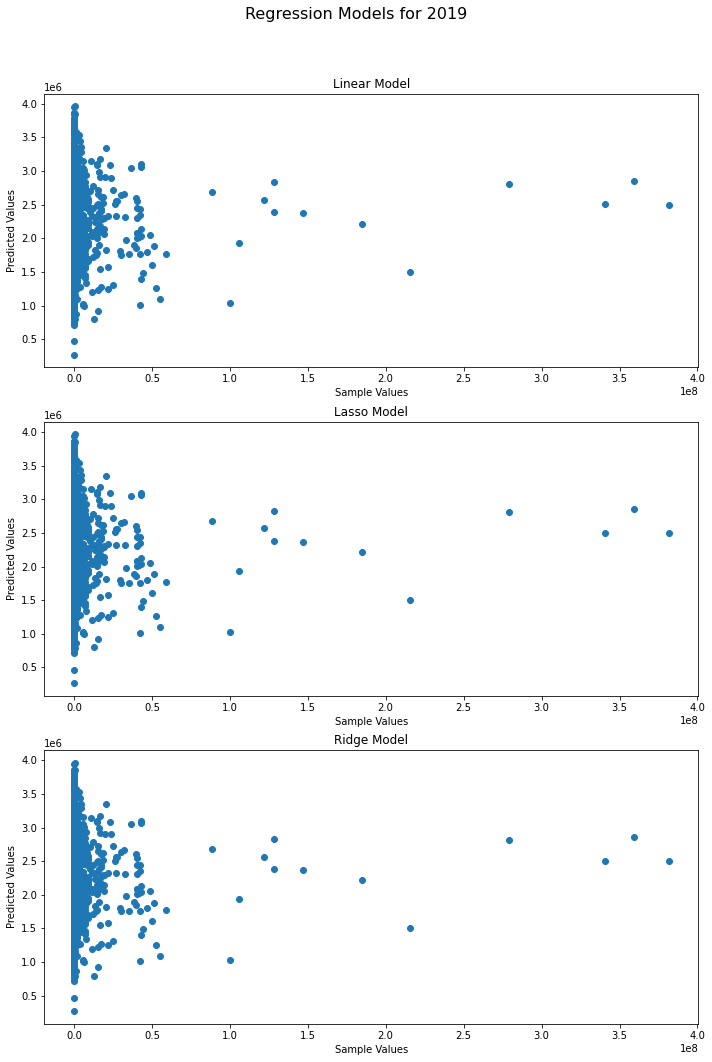

Metrics for 2019 year:

Linear Model:
	R²: -0.0005
	MAE: 3676922.5754
	MSE: 240645899557256.4375
	RMSE: 15512765.6966

Lasso Model:
	R²: -0.0005
	MAE: 3676922.5898
	MSE: 240645899535430.0625
	RMSE: 15512765.6959

Ridge Model:
	R²: -0.0005
	MAE: 3676922.6294
	MSE: 240645893669798.6562
	RMSE: 15512765.5068


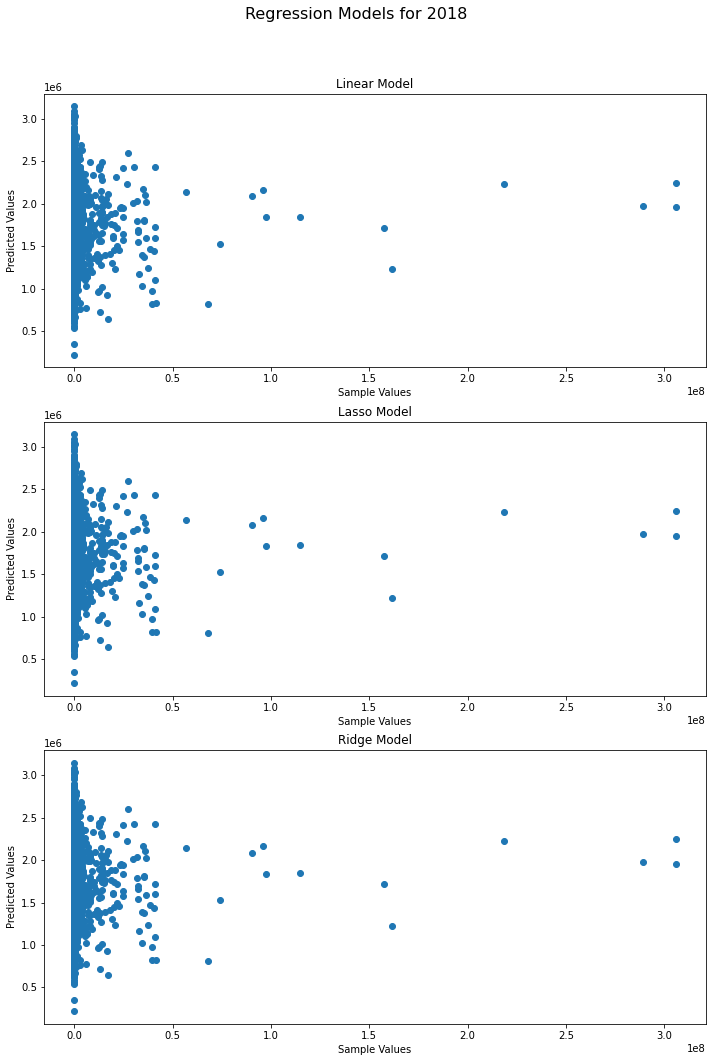

Metrics for 2018 year:

Linear Model:
	R²: -0.0003
	MAE: 2954139.3731
	MSE: 157807047278171.0000
	RMSE: 12562127.4981

Lasso Model:
	R²: -0.0003
	MAE: 2954139.3887
	MSE: 157807047244070.5312
	RMSE: 12562127.4967

Ridge Model:
	R²: -0.0003
	MAE: 2954139.4363
	MSE: 157807043870601.7188
	RMSE: 12562127.3625


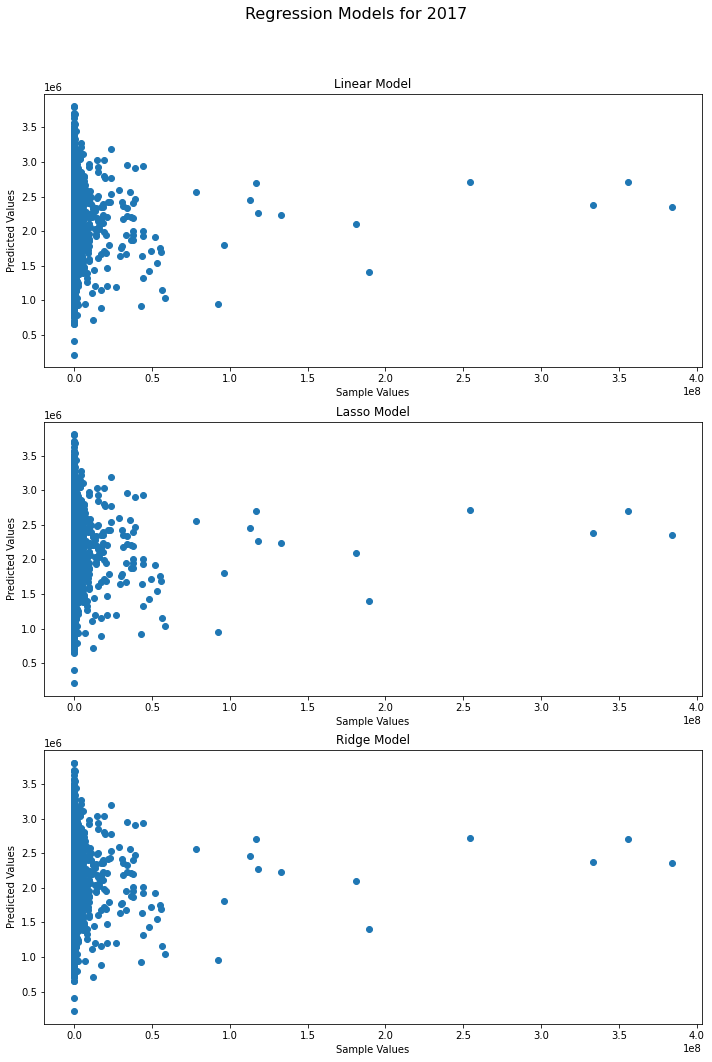

Metrics for 2017 year:

Linear Model:
	R²: -0.0006
	MAE: 3500164.4005
	MSE: 223804741187159.0312
	RMSE: 14960104.9858

Lasso Model:
	R²: -0.0006
	MAE: 3500164.4121
	MSE: 223804741131759.2812
	RMSE: 14960104.9840

Ridge Model:
	R²: -0.0006
	MAE: 3500164.4041
	MSE: 223804735249609.0312
	RMSE: 14960104.7874


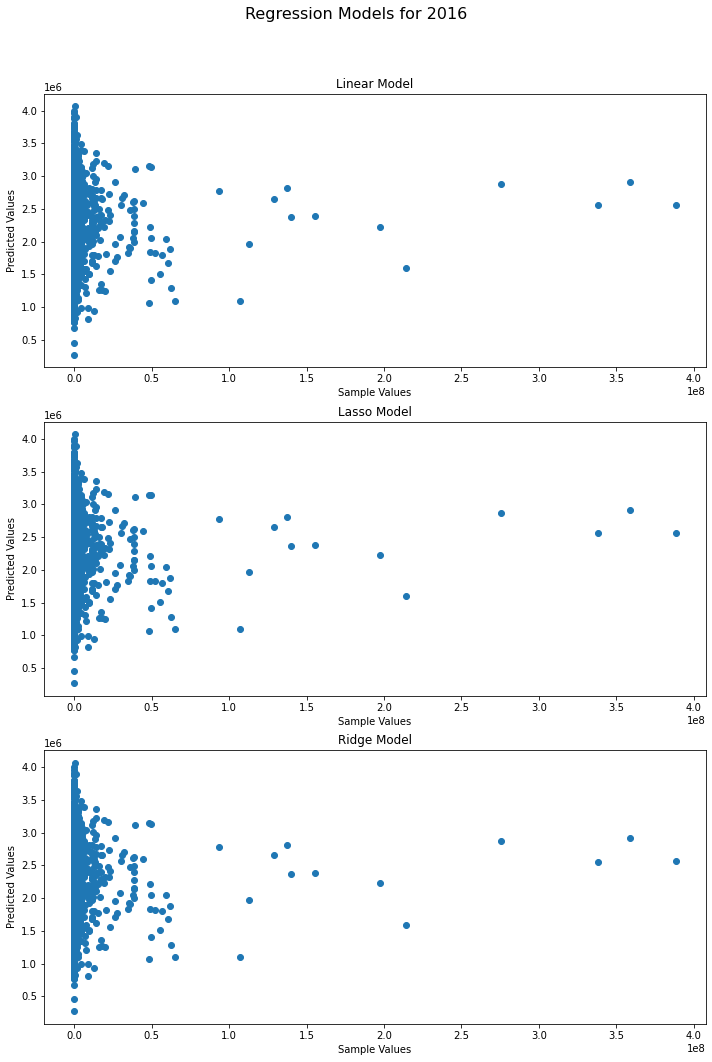

Metrics for 2016 year:

Linear Model:
	R²: -0.0006
	MAE: 3735801.2707
	MSE: 249175083732208.1250
	RMSE: 15785280.6035

Lasso Model:
	R²: -0.0006
	MAE: 3735801.2809
	MSE: 249175083668250.5312
	RMSE: 15785280.6015

Ridge Model:
	R²: -0.0006
	MAE: 3735801.2507
	MSE: 249175077318790.5625
	RMSE: 15785280.4004


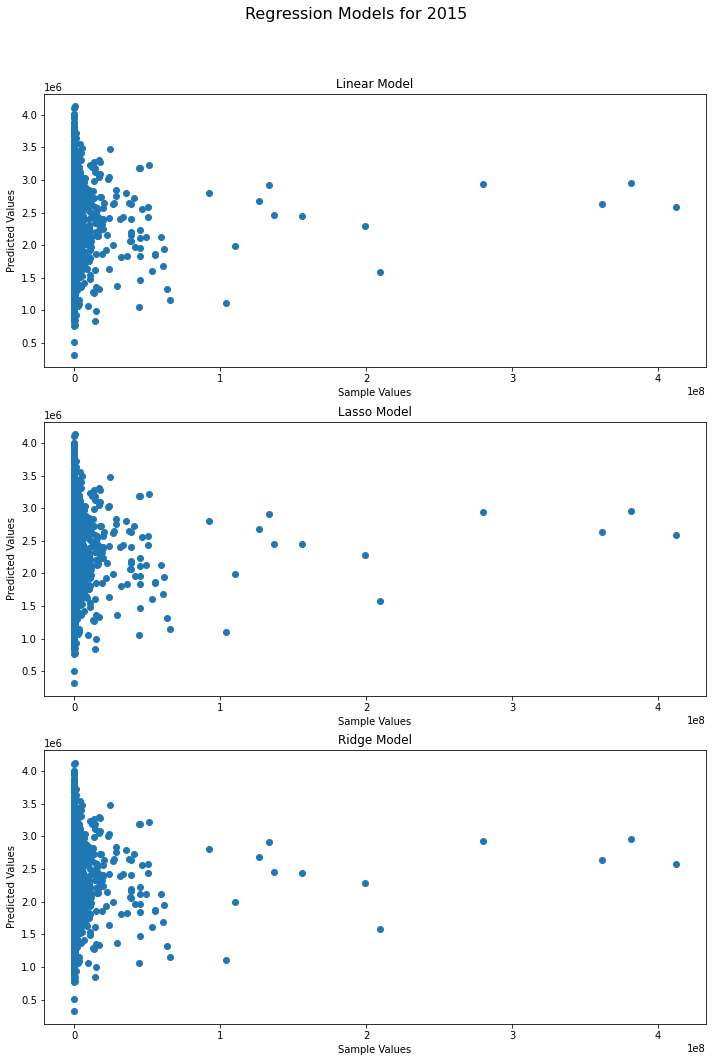

Metrics for 2015 year:

Linear Model:
	R²: -0.0004
	MAE: 3857833.9197
	MSE: 268459133375102.1250
	RMSE: 16384722.5602

Lasso Model:
	R²: -0.0004
	MAE: 3857833.9333
	MSE: 268459133361383.0000
	RMSE: 16384722.5598

Ridge Model:
	R²: -0.0004
	MAE: 3857833.9480
	MSE: 268459127168528.2188
	RMSE: 16384722.3708


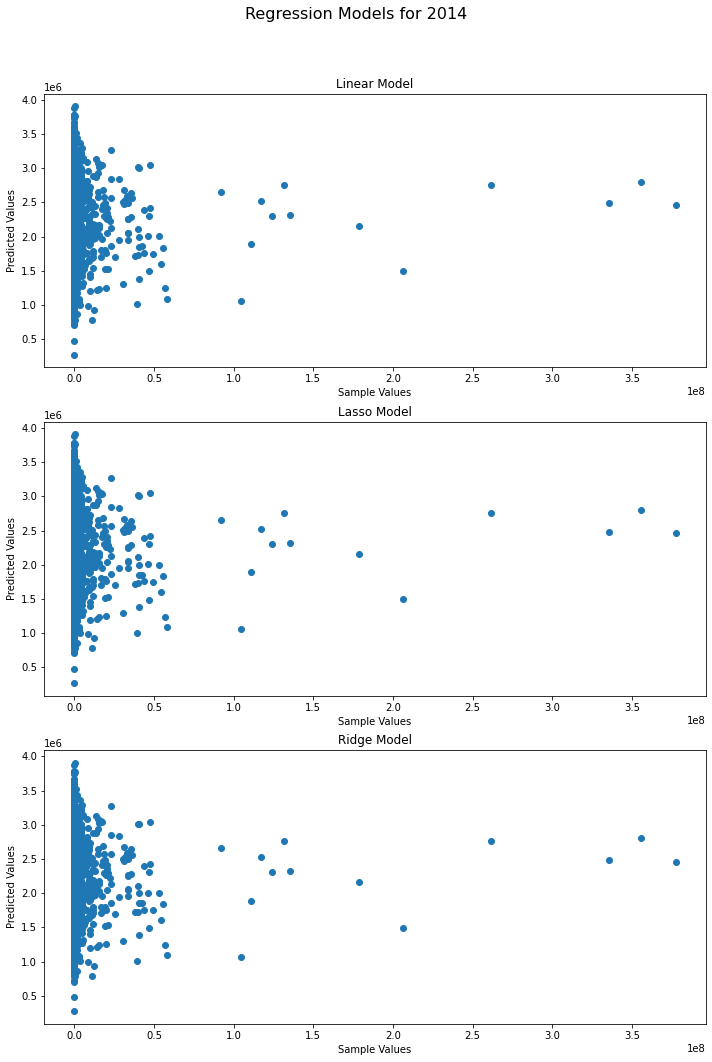

Metrics for 2014 year:

Linear Model:
	R²: -0.0004
	MAE: 3651132.5841
	MSE: 232698596141443.1250
	RMSE: 15254461.5159

Lasso Model:
	R²: -0.0004
	MAE: 3651132.5998
	MSE: 232698596132546.9062
	RMSE: 15254461.5157

Ridge Model:
	R²: -0.0004
	MAE: 3651132.6651
	MSE: 232698590794026.0625
	RMSE: 15254461.3407


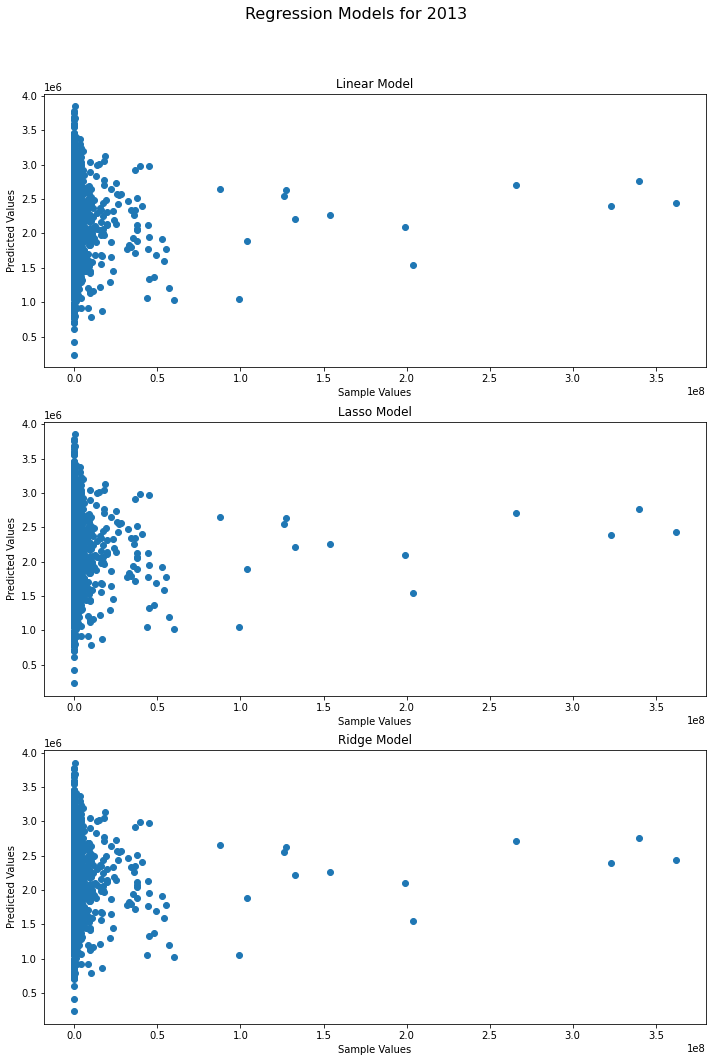

Metrics for 2013 year:

Linear Model:
	R²: -0.0004
	MAE: 3511181.0820
	MSE: 223781937533366.6562
	RMSE: 14959342.8176

Lasso Model:
	R²: -0.0004
	MAE: 3511181.0945
	MSE: 223781937482725.6250
	RMSE: 14959342.8159

Ridge Model:
	R²: -0.0004
	MAE: 3511181.1651
	MSE: 223781932328484.8750
	RMSE: 14959342.6436


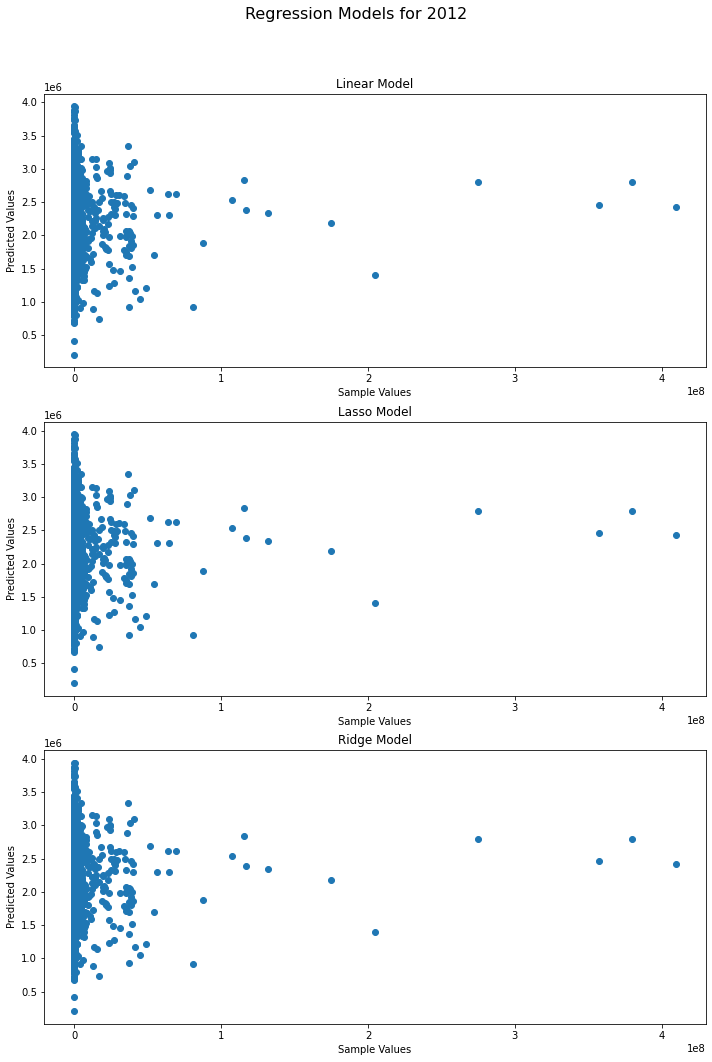

Metrics for 2012 year:

Linear Model:
	R²: -0.0003
	MAE: 3676440.0882
	MSE: 247963643242176.2500
	RMSE: 15746861.3775

Lasso Model:
	R²: -0.0003
	MAE: 3676440.0799
	MSE: 247963643059434.0312
	RMSE: 15746861.3717

Ridge Model:
	R²: -0.0003
	MAE: 3676440.0896
	MSE: 247963637889067.8750
	RMSE: 15746861.2075


In [6]:
# We can play with the formatting, I think we need to evaluate our data for faults as our metric scores are awful.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# List of models to test
list_of_models = ["Linear", "Lasso", "Ridge"]


# Function to create model and plot predictions, and also return accuracy metrics
def model_maker(model, X_train, X_test, y_train, y_test, ax, model_idx):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Selecitng the appropriate model at this point in the function/loop
    if model == "Linear":
        reg = LinearRegression()
    elif model == "Lasso":
        reg = Lasso(alpha=.2)  
    elif model == "Ridge":
        reg = Ridge(alpha=.1)  
    
    # Fit the model
    reg.fit(X_train_scaled, y_train)
    
    # Predicting the values
    y_pred = reg.predict(X_test_scaled)
    
    # Plot the scatter plot in the correct axis
    ax.scatter(y_test, y_pred)
    ax.set_xlabel("Sample Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{model} Model")
    
    # Testing all of our accuracy metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Return the metrics
    return r2, mae, mse, rmse

# Loop through each wildfire year and create the subplots for all models
for wildfire in list_of_cumulation:
    X = climate_df[climate_features]
    y = wildfire_df[wildfire]
    
    # Changing sample to 10,000 rows to match our features
    y = y.sample(n=10000, random_state=41)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

    fig, ax = plt.subplots(3, 1, figsize=(10, 15))  
    
    # Making a dictionary to store our values for printing later
    metrics = {}

    # Loop through the models and create a subplot for each model
    for idx, model in enumerate(list_of_models):
        r2, mae, mse, rmse = model_maker(model, X_train, X_test, y_train, y_test, ax[idx], idx)
        metrics[model] = {
            "R²": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        }
    
    # Title for the given year
    fig.suptitle(f"Regression Models for {wildfire}", fontsize=16)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  

    # Show the plot for this year
    plt.show()

    # Printing the accuracy of each model
    print(f"Metrics for {wildfire} year:")
    for model in list_of_models:
        print(f"\n{model} Model:")
        print(f"\tR²: {metrics[model]['R²']:.4f}")
        print(f"\tMAE: {metrics[model]['MAE']:.4f}")
        print(f"\tMSE: {metrics[model]['MSE']:.4f}")
        print(f"\tRMSE: {metrics[model]['RMSE']:.4f}")